## Real Estate Price Prediction

In [2]:
import pandas as pd
import numpy as np 

In [4]:
dt=pd.read_csv('data\Real_Estate.csv')
dt.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [ ]:
dt.drop(columns=['Transaction date'], axis=1, inplace=True)

In [6]:
dt.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,35.5,274.0144,2,25.012148,121.546990,24.970725
2,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,8.5,967.4000,6,25.011037,121.479946,21.654710


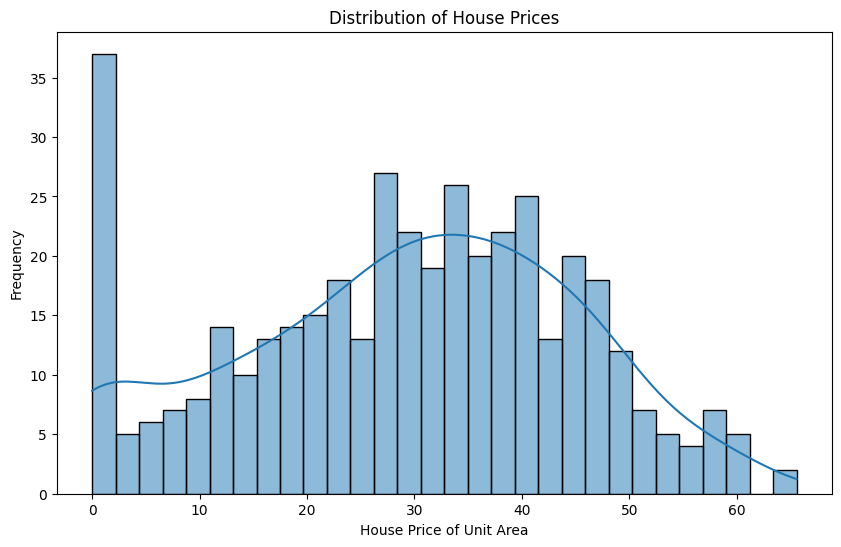

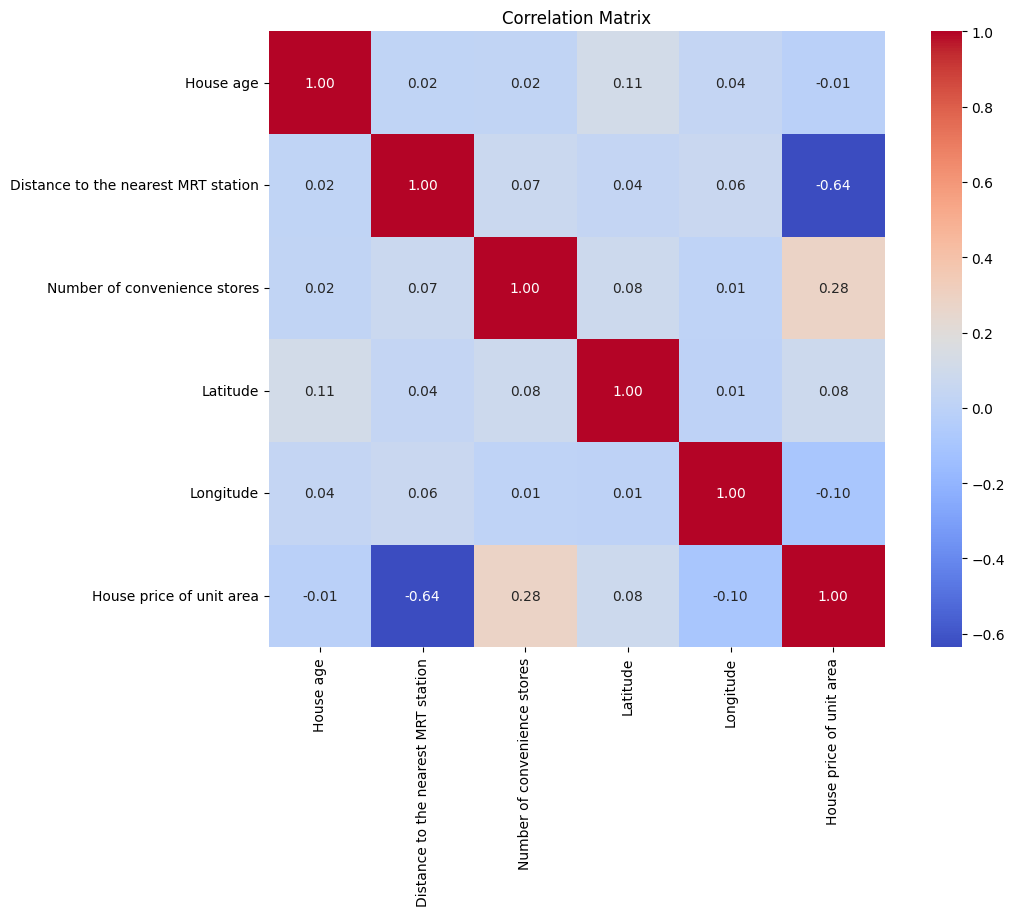

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(dt['House price of unit area'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price of Unit Area')
plt.ylabel('Frequency')
plt.show()
# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = dt.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [11]:
# After visualizing the data, we can drop House age feature.
dt.drop(columns=['House age'], axis=1, inplace=True)

In [12]:
# train-test split
from sklearn.model_selection import train_test_split
X = dt.drop(columns=['House price of unit area'])
y = dt['House price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [13]:
# model training
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# model evaluation
from sklearn.metrics import mean_squared_error, r2_score    
def evaluate_model(model, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')


In [17]:
# predicting on the test set
y_pred = model.predict(X_test_scaled)

# evaluating the model
print("Model Evaluation:")
evaluate_model(model, y_test, y_pred)

Model Evaluation:
Mean Squared Error: 124.57938927543917
R^2 Score: 0.5496730640945564


In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV    
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, 3, 5]
}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# evaluating the best model
y_pred_best = best_model.predict(X_test_scaled)
evaluate_model(best_model, y_test, y_pred_best)

Best parameters found:  {'fit_intercept': True, 'n_jobs': 1}
Mean Squared Error: 124.57938927543917
R^2 Score: 0.5496730640945564


In [24]:
#saving the model
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)  

print("Model and scaler saved successfully.")

Model and scaler saved successfully.
